## Predicto api - Follow Nasdaq Outlook Score
Sample usage to retrieve latest Nasdaq outlook score programmatically (https://predic.to)

To use predicto api and reproduce this notebook, you'll need to have a valid Predicto account. 
If you don't have one, you can create one here: https://predic.to and get a free trial period.

To authenticate you'll need an api key. To retrieve it, login to https://predic.to and head to your [settings page](https://predic.to/account). Then paste it in the `predicto_api_key` variable below.

If you get any exception/error while running below code, please make sure your api key is correct and your subscription/trial is not expired.
Please note that there is a limit to the number of requests you can make per minute, depending on your account type.

### Import needed packages

In [1]:
import sys
sys.path.append("../predicto_api/")

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import IPython.display as display

from predicto_api_wrapper import PredictoApiWrapper, TradeAction

### Prepare and initialize our Predicto wrapper
You'll need to have a valid Predicto account as mentioned above, and get an api key. Then replace the `predicto_api_key` variable below

In [8]:
predicto_api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
predicto_api_wrapper = PredictoApiWrapper(predicto_api_key)

### Let's start by retrieving latest Nasdaq Outlook Score
We generate forecasts and trade picks for a limited amount of stocks for the time being

In [7]:
# get latest Predicto Nasdaq Outlook Score
outlook_json = predicto_api_wrapper.get_nasdaq_outlook_score(None)
outlook_json

{'GoingDownMean': -0.012874223009800387,
 'GoingDownTotal': 8,
 'GoingUpMean': 0.010137644742666858,
 'GoingUpTotal': 20,
 'OutlookScore': 0.5}

### Let's plot the Predicto Market Outlook Score for the last 15 days

Nasdaq Outlook Score for 2021-01-08 is -0.1
Nasdaq Outlook Score for 2021-01-09 is -0.1
Nasdaq Outlook Score for 2021-01-10 is -0.2
Nasdaq Outlook Score for 2021-01-11 is -0.2
Nasdaq Outlook Score for 2021-01-12 is -0.4
Nasdaq Outlook Score for 2021-01-13 is -0.4
Nasdaq Outlook Score for 2021-01-14 is -0.3
Nasdaq Outlook Score for 2021-01-15 is -0.0
Nasdaq Outlook Score for 2021-01-16 is -0.0
Nasdaq Outlook Score for 2021-01-17 is -0.0
Nasdaq Outlook Score for 2021-01-18 is -0.1
Nasdaq Outlook Score for 2021-01-19 is 0.3
Nasdaq Outlook Score for 2021-01-20 is 0.4
Nasdaq Outlook Score for 2021-01-21 is 0.4
Nasdaq Outlook Score for 2021-01-22 is 0.5
Nasdaq Outlook Score for 2021-01-23 is 0.0


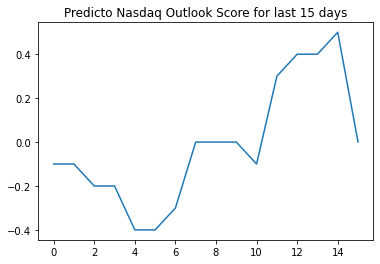

In [6]:
go_back_days = 15
from_date = (datetime.today() - timedelta(days=go_back_days)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')

outlook_scores = []
date_range = pd.date_range(from_date, end_date, freq='1D')
date_range = date_range.map(lambda x: x.strftime('%Y-%m-%d'))

for sdate in date_range:
    outlook_json = predicto_api_wrapper.get_nasdaq_outlook_score(sdate)
    outlook_scores.append(outlook_json['OutlookScore'])
    print('Nasdaq Outlook Score for {0} is {1}'.format(sdate, outlook_json['OutlookScore']))
    
# plot it
plt.title("Predicto Nasdaq Outlook Score for last {0} days".format(go_back_days))
plt.plot(outlook_scores)